# A drop in user engagement
***

## Context

Given my business background, putting data manipulation techniques at the service of extracting intelligence from raw big data to get insights that helps the business move forward, it is where data analytics really come to life for me.

One key area where companies become concerned and willing to exploit data to get guidance on where the problems are lying or how they can be solved, is related to customer retention or user engagement.

So, let's imagine that we are analysts working for a technological company whose most important KPI revolves around how customers are using its main product. A product that is a sort of an intranet social network within the workplace where a user can send and receive individual or group messages, like them, share documents, check inbox, post ideas, and search for info from other users of the same company. We will call it "Hub" moving on for simplification purposes.

Hub is sold to several companies around the world so that its employees have communication tools available. They can make use of it for free but the companies pay fees to enable that.

## Data

The data is comprised of 3 tables: users, events and emails. [Here is a look at them]

The first table collects basic info on the users, that is, identification number, status of the account, date when the lead signed up, date when the lead completed the signup process and became a user, language and company the user works for.

The second table gathers info on the interactions of the users with the product, type of interaction, dates and times of it, location açnd device used.

The last table is about the user response on the email interactions between our company and the user. It is just limited to the emails sent in the form of content weekly digest to foster engagement.

[All the data as well as the code can be found here]

## Workflow methodology

The dataset described above was pushed to a PostgreSQL database. On the other hand, SQLalchemy library, which incoporates psycopg2 adapter, allows us through its engine module to blend the workflow between postgreSQL database and Python, so that we can run our queries in SQL language without leaving our Jupyter notebook, and this means that Python smoothly takes over the dataframes queried to perform further data manipulation and visualizations.

## Coding

#### Importing needed libraries

In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.pyplot import style
from plotly import graph_objects as go

#### Importing data

In [5]:
msn_users = pd.read_csv("../Data/users.csv")

In [6]:
msn_users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [7]:
msn_events = pd.read_csv("../Data/events.csv")

In [8]:
msn_events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [9]:
msn_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340832 entries, 0 to 340831
Data columns (total 7 columns):
user_id        340832 non-null float64
occurred_at    340832 non-null object
event_type     340832 non-null object
event_name     340832 non-null object
location       340832 non-null object
device         340832 non-null object
user_type      325255 non-null float64
dtypes: float64(2), object(5)
memory usage: 18.2+ MB


In [10]:
msn_emails = pd.read_csv("../Data/emails.csv")

In [11]:
msn_emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


POSTGRESQL local connection

In [6]:
driver = "postgresql:"
user = "postgres"
password = "ironhack"
ip = "localhost:5432"
database = "internal_messenger"

In [7]:
postgresql_connection_string = f"{driver}//{user}:{password}@{ip}/{database}"
engine = create_engine(postgresql_connection_string)

#### Uploading data to the POSTGRESQL DB

In [ ]:
msn_users.to_sql("users", con=engine, if_exists="append", index=False)

In [ ]:
msn_events.to_sql("events", con=engine, if_exists="append", index=False)

In [ ]:
msn_emails.to_sql("emails", con=engine, if_exists="append", index=False)

#### Fetching all data from the db to check that the connection is working properly and the datasets are correctly uploaded

In [15]:
query_users_pg = """
SELECT *
FROM users;
"""

In [16]:
users = pd.read_sql(query_users_pg, engine)

In [17]:
users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,None,pending
2,2.0,2013-01-01 10:59:05,51.0,english,None,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [18]:
query_events_pg = """
SELECT *
FROM events;
"""

In [19]:
events = pd.read_sql(query_events_pg, engine)

In [20]:
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [21]:
query_emails_pg = """
SELECT *
FROM emails;
"""

In [22]:
emails = pd.read_sql(query_emails_pg, engine)

In [23]:
emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


## The issue. A drop in user engagement

End of month comes and when reviewing key metric dashboards something stands out (see below). User engagement has experienced a decline. Engagement in this case is defined as server calls by interacting with the product, in other words, when a user is logging in to the Hub during a given week he/she is engaging with the product. So, users not logging in, hence not engaging, is definitely not good for the business, so as an analyst you wonder what is going on and get ready to crunch the database to get insights and guide possible corrective actions.

In [9]:
query_issue = """
SELECT SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) AS weekly_active_users
FROM events
WHERE event_name = 'login'
GROUP BY week
ORDER BY week;
"""
user_engagement = pd.read_sql(query_issue, engine)

In [10]:
user_engagement

,week,weekly_active_users
0,04-28,701
1,05-05,1054
2,05-12,1094
3,05-19,1147
4,05-26,1113
5,06-02,1173
6,06-09,1219
7,06-16,1262
8,06-23,1249
9,06-30,1271


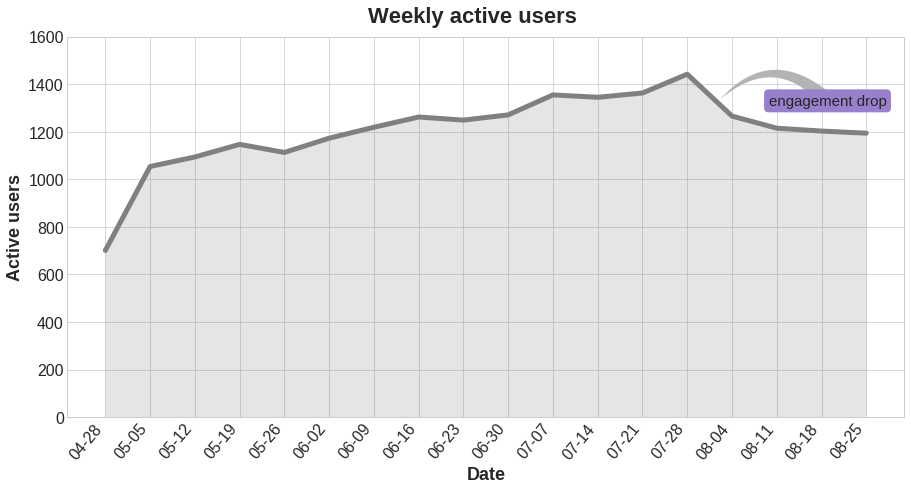

In [19]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(user_engagement["week"], user_engagement["weekly_active_users"], lw=5, color="gray")
    ax.set_ylim(0, 1600)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)
    
    ax.fill_between(user_engagement["week"], 0, user_engagement["weekly_active_users"], facecolor='gray', alpha=0.2)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        
    ax.annotate("engagement drop", xy=(13.7, 1330), xycoords='data', xytext=(50, 0), textcoords='offset points',
                size=15, va="center", bbox=dict(boxstyle="round", fc=(0.6, 0.5, 0.8), ec="none"),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                fc=(0.7, 0.7, 0.7), ec="none",
                                patchA=None,
                                patchB=None,
                                relpos=(0.5, 0.5),
                                connectionstyle="arc3,rad=0.5"))
    
    plt.savefig("../Figures/Drop in weekly active users", dpi=300)
    plt.show()

Before starting querying away, it is recommendable to think on all the possible sources that may result in a user engagement drop like the one of this case:

* Holidays. August is in many countries, especially in those located in the north hemisphere, the month with the greater number of vacation leaves overall, so this might well be what explains the drop.
<br>

* Performance issue. Many times the main source of issues among ecommerce, marketplaces or technological companies springs from the pure interaction with the website/app and it might affect differently a user or another depending simply on the device type and its operative system that is using to log in. It might also happen that tech team has introduced a change in the web/app frontend that affects a particular feature impacting directly the engagement in a negative way. Website loading slowed down or broken features within the session navigation may cause bad user experience translating in less product engagement.
<br>
 
* Sign-up feature flow. For a lead to become a user who is able to log in and use the product, he/she has to go first through each step of the sign-up flow. It could be the case for instance that there are technical issues in any feature of the flow that might be preventing new users to sign up, hence missing the new engagement contribution from newbies that naturally offsets the systematic churn.
<br>

* Broken tracking log. It could also happen that the code/log that identifies every single user action is itself corrupted or affected. Seeing a drop in a particular feature to absolutely zero would hint the issue is coming in this direction. 
<br>
 
* Bad data. We could be storing records of "dirty" product traffic, meaning by that not the one from real users which is the one we are interested in. For instance, a new feature or new technological infrastructure might be developed and tested by QA. Usually QA and production data are separated but QA activity due to a glitch might end up being mixed with real external users traffic. Or this bad data could come from bots that due to those same changes are now crawling the web in a different way, hence causing traffic records swings.
<br>

* Technical issues related with the emails that are sent in the form of weekly digest emails that are designed to bring customers back and foster engagement by summarize its activity and colleagues's in the previous week.

## Holidays

*This query below tries to find the countries where the number of active users in august was greater than in july. In order to consider holidays as the reason for the user engagement drop we would like to see in the query output a list of countries where august is not the main vacation month, which we would expect either from countries whose tradition makes that the predominant vacation month is none in particular, or just another one because of for example, being located in the south hemisphere.*

In [23]:
query_holidays= """
SELECT sub3.location
FROM(
    SELECT sub2.*
    FROM(
        SELECT sub1.*, LAG(sub1.active_users, 1) OVER (PARTITION BY sub1.location) AS active_users_t0
        FROM(
            SELECT location, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM events
            WHERE event_name = 'login'
            GROUP BY location, month
            ) sub1
        ) sub2
    WHERE sub2.month = 8
    ) sub3
WHERE sub3.active_users - sub3.active_users_t0 > 0;
"""

holidays_1 = pd.read_sql(query_holidays, engine)

In [85]:
(holidays_1.style
.apply(lambda x: ["background: gold" if c == x.ix[14,"location"] else "" for c in x], axis=0)
)


/home/salva/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,location
0,Colombia
1,Denmark
2,Egypt
3,Greece
4,Indonesia
5,Iraq
6,Ireland
7,Malaysia
8,Pakistan
9,Philippines


I am Spanish and I can say that august is traditionally the predominant vacation month. Greece for instance is much of the same as far as I know.

In [20]:
query_holidays= """
SELECT location, LEFT((DATE_TRUNC('month', occurred_at::date))::text, 7) AS month,
 COUNT(DISTINCT user_id) AS monthly_active_users
FROM events
WHERE event_name = 'login' AND location IN ('Spain', 'Greece')
GROUP BY location, month;
"""
holidays_2 = pd.read_sql(query_holidays, engine)

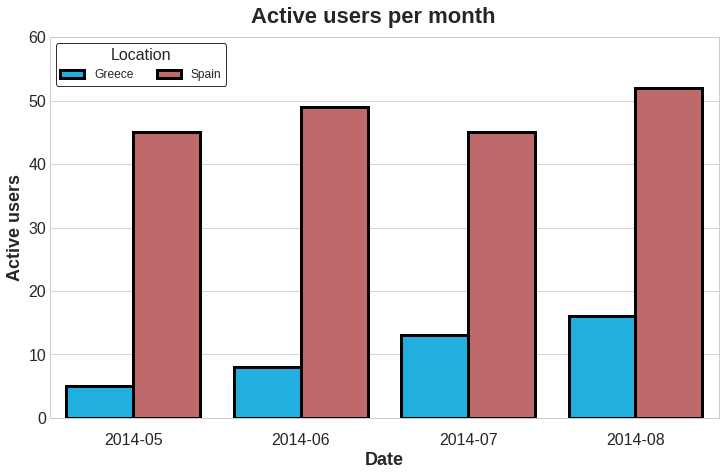

In [22]:
with plt.style.context('seaborn-whitegrid'):

    palette=["deepskyblue","indianred"]
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Active users per month", fontsize=22, fontweight=650, y=0.94)
    
    sns.barplot(x="month", y="monthly_active_users", hue="location", data=holidays_2,
               palette=palette, edgecolor="black", linewidth=3)     
    plt.ylim(0, holidays_2.monthly_active_users.max()+8)
    plt.tick_params(axis="x", labelsize=16, pad=15)
    plt.tick_params(axis="y", labelsize=16)
    plt.xlabel("Date", fontsize=18, fontweight=650)
    plt.ylabel("Active users", fontsize=18, fontweight=650)
    
    ax.legend(loc="upper left", prop={'size': 12}, frameon="yes", edgecolor="black",
          title="Location", title_fontsize=16, ncol=2)

    plt.savefig("../Figures/Spain_Greece_active_users_per_month", dpi=300)
    plt.show()

So it somewhat discourages me to think that holidays is the reason for the user engagement drop. I would rather be investigating other possible reasons rather than digging deeper into this one. Active users are increasing in a month where we would expect otherwise if this would be the actual reason for the overall user engagement in the Hub.

### Broken feature

#### Device type

In [49]:
query_model_device = """
SELECT DISTINCT device
FROM events;
"""
device_0 = pd.read_sql(query_model_device, engine)

Below are listed all the model devices that have been used to log into the intranet

In [50]:
device_0

,device
0,samsumg galaxy tablet
1,asus chromebook
2,samsung galaxy note
3,iphone 5s
4,nexus 10
5,nokia lumia 635
6,macbook air
7,iphone 5
8,dell inspiron desktop
9,htc one


In [51]:
query_model_device = """
SELECT sub1.device_type AS device_type,
 SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) as active_users
FROM(
    SELECT *,
    CASE WHEN device IN ('nexus 10', 'windows surface', 'nexus 7', 'kindle fire') 
          OR device LIKE '%%pad%%' OR device ILIKE '%%tablet%%' THEN 'tablet'
         WHEN device IN ('nexus 5', 'samsung galaxy note', 'samsung galaxy s4', 'htc one', 'nokia 635')
          OR device LIKE '%%phone%%' THEN 'phone'
         ELSE 'laptop/PC' END AS device_type
    FROM events
    ) sub1
WHERE event_name = 'login'
GROUP BY device_type, week
ORDER BY week, device_type; 
"""

device_1 = pd.read_sql(query_model_device, engine)

In [52]:
device_1.head(10)

,device_type,week,active_users
0,laptop/PC,04-28,358
1,phone,04-28,262
2,tablet,04-28,198
3,laptop/PC,05-05,619
4,phone,05-05,427
5,tablet,05-05,332
6,laptop/PC,05-12,600
7,phone,05-12,459
8,tablet,05-12,350
9,laptop/PC,05-19,629


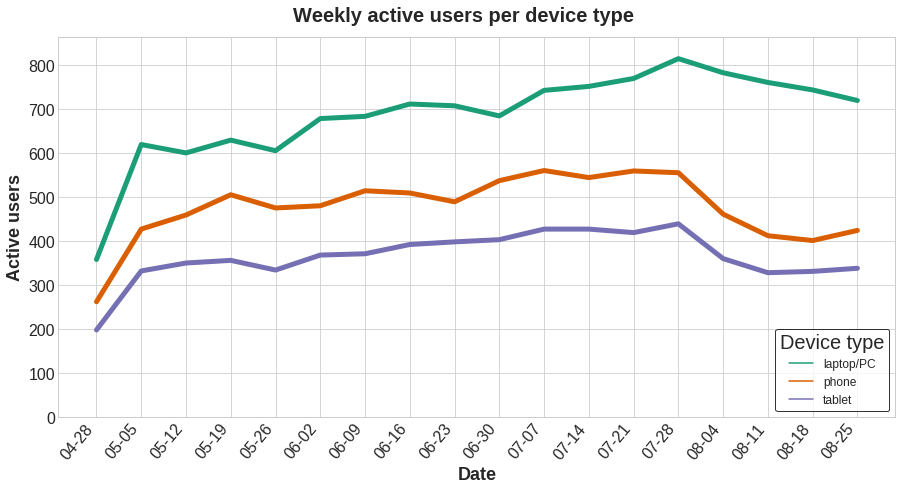

In [67]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users per device type", fontsize=20, fontweight=550, y=0.94)  
    
    ax=sns.lineplot(x="week", y="active_users", data=device_1, hue="device_type", palette="Dark2", lw=5) 
    ax.set_ylim(0, device_1.active_users.max()+50)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="lower right", handles=handles[1:], labels=labels[1:], prop={'size': 12}, frameon="yes",
              edgecolor="black", title="Device type", title_fontsize=20)
    
    plt.savefig("../Figures/Weekly_active_users_per_device_type", dpi=300) 
    plt.show()

In [86]:
query_model_device = """
SELECT device_type, active_users_t0, active_users, (active_users-active_users_t0) AS variation_drop,
 ROUND(CAST(((active_users::float-active_users_t0::float) / active_users_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub3.*
    FROM(
        SELECT sub2.*, LAG(sub2.active_users, 1) OVER (PARTITION BY sub2.device_type) AS active_users_t0
        FROM(
            SELECT sub1.device_type AS device_type, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM(
                SELECT *,
                CASE WHEN device IN ('nexus 10', 'windows surface', 'nexus 7', 'kindle fire') 
                      OR device LIKE '%%pad%%' OR device ILIKE '%%tablet%%' THEN 'tablet'
                     WHEN device IN ('nexus 5', 'samsung galaxy note', 'samsung galaxy s4', 'htc one', 'nokia 635')
                      OR device LIKE '%%phone%%' THEN 'phone'
                     ELSE 'laptop/PC' END AS device_type
                FROM events
                ) sub1
            WHERE event_name = 'login'
            GROUP BY device_type, month
            ) sub2
        ) sub3
    WHERE sub3.month = 8
    ) sub4;  
"""

device_2 = pd.read_sql(query_model_device, engine)

In [87]:
device_2.style.format({"variation_pct":"{:.2f}%"})

,device_type,active_users_t0,active_users,variation_drop,variation_pct
0,laptop/PC,2000,1936,-64,-3.20%
1,phone,1683,1276,-407,-24.18%
2,tablet,1256,1050,-206,-16.40%


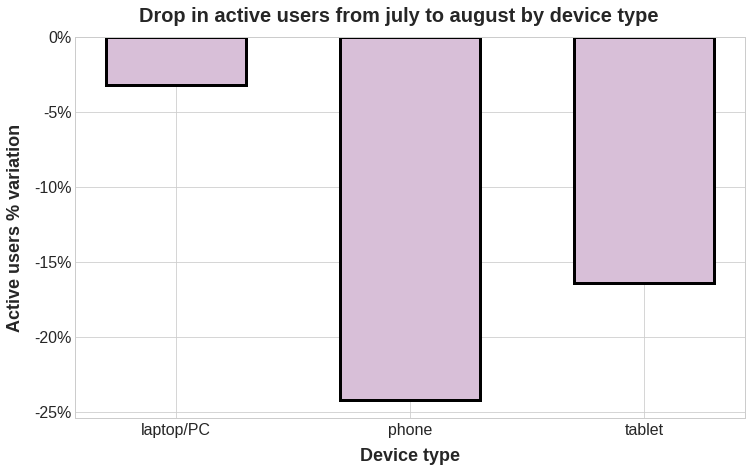

In [88]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in active users from july to august by device type", fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(device_2["device_type"], device_2["variation_pct"], color="thistle", width=0.6,
            edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Active users % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    
    plt.savefig("../Figures/Drop in active users from july to august by device type", dpi=300) 
    plt.show()

### Operative system

In [90]:
query_operative_system = """
SELECT sub1.device_os AS device_os,
 SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week,
 COUNT(DISTINCT user_id) as active_users
FROM(
    SELECT *,
    CASE WHEN device LIKE 'i%%' OR device ILIKE '%%mac%%' THEN 'apple'
     WHEN device LIKE '%%nexus%%' OR device LIKE '%%galaxy%%' OR device LIKE '%%nokia%%'
      OR device LIKE '%%HTC%%' OR device LIKE '%%fire%%' THEN 'android'
     ELSE 'windows' END AS device_os
    FROM events
    ) sub1
WHERE event_name = 'login'
GROUP BY device_os, week
ORDER BY week, device_os; 
"""

operative_system_1 = pd.read_sql(query_operative_system, engine)

In [91]:
operative_system_1.head(10)

,device_os,week,active_users
0,android,04-28,174
1,apple,04-28,376
2,windows,04-28,246
3,android,05-05,284
4,apple,05-05,601
5,windows,05-05,426
6,android,05-12,300
7,apple,05-12,638
8,windows,05-12,430
9,android,05-19,311


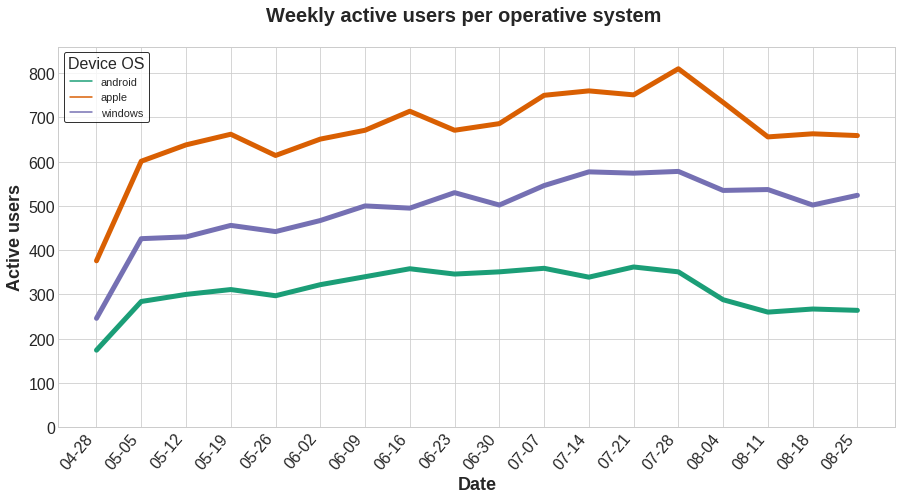

In [92]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Weekly active users per operative system", fontsize=20, fontweight=650, y=0.96)  
    
    ax=sns.lineplot(x="week", y="active_users", data=operative_system_1, hue="device_os", palette="Dark2", lw=5) 
    ax.set_ylim(0, operative_system_1.active_users.max()+50)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon="yes",
              edgecolor="black", title="Device OS", title_fontsize=16)
        
    plt.savefig("../Figures/Weekly active users per operative system", dpi=300) 
    plt.show()

In [93]:
query_operative_system = """
SELECT device_os, active_users_t0, active_users, (active_users-active_users_t0) AS variation_drop,
 ROUND(CAST(((active_users::float-active_users_t0::float) / active_users_t0)*100 as numeric) ,2) AS variation_pct
FROM(
    SELECT sub3.*
    FROM(
        SELECT sub2.*, LAG(sub2.active_users, 1) OVER (PARTITION BY sub2.device_os) AS active_users_t0
        FROM(
            SELECT sub1.device_os AS device_os, EXTRACT('month' FROM occurred_at::date) AS month,
             COUNT(DISTINCT user_id) as active_users
            FROM(
                SELECT *,
                CASE WHEN device LIKE 'i%%' OR device ILIKE '%%mac%%' THEN 'apple'
                     WHEN device LIKE '%%nexus%%' OR device LIKE '%%galaxy%%' OR device LIKE '%%nokia%%'
                      OR device LIKE '%%HTC%%' OR device LIKE '%%fire%%' THEN 'android'
                     ELSE 'windows' END AS device_os
                FROM events
                ) sub1
            WHERE event_name = 'login'
            GROUP BY device_os, month
            ) sub2
        ) sub3
    WHERE sub3.month = 8
    ) sub4;
"""

operative_system_2 = pd.read_sql(query_operative_system, engine)

In [94]:
operative_system_2.style.format({"variation_pct":"{:.2f}%"})

,device_os,active_users_t0,active_users,variation_drop,variation_pct
0,android,1045,805,-240,-22.97%
1,apple,1997,1769,-228,-11.42%
2,windows,1500,1441,-59,-3.93%


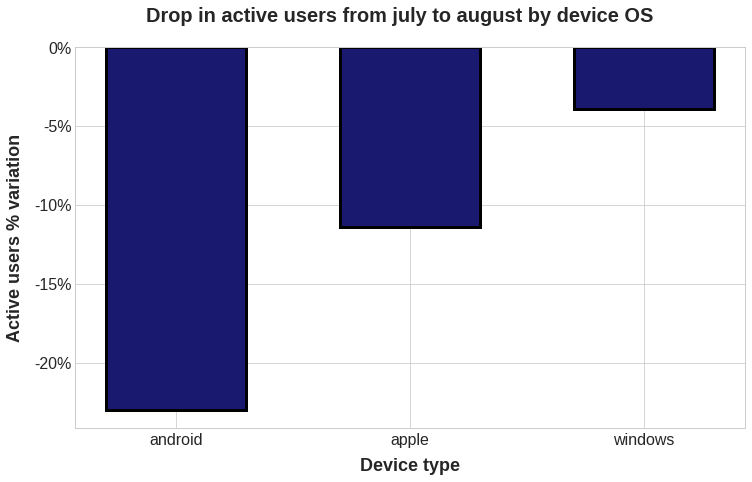

In [95]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Drop in active users from july to august by device OS",
                 fontsize=20, fontweight=650, y=0.96)
    
    ax.bar(operative_system_2["device_os"], operative_system_2["variation_pct"], color="midnightblue", width=0.6,
        edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Active users % variation", fontsize=18, fontweight=650, labelpad=10)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)

    plt.savefig("../Figures/Drop in active users from july to august by device OS", dpi=300) 
    plt.show()

## Specific feature flow/broken tracking code

### Usage flow

*It might be the case that some specific feature within the usage flow was broken at some point close to end of july or within august, hence causing a bad user experience and in consequence prompting users to be less engaged on posterior days to that hypothetical malfunctioning.*

In [ ]:
query_usage_flow = """
SELECT SUBSTR(((DATE_TRUNC('week', occurred_at::date)))::text, 6, 5) AS week, event_name,
 COUNT(user_id) AS event_count
FROM events
WHERE event_type = 'engagement'AND event_name NOT LIKE '%%result%%' --This last statement is optional. It is just to exclude the various search results
GROUP BY week, event_name
ORDER BY week;
"""

usage_flow = pd.read_sql(query_usage_flow, engine)

In [ ]:
usage_flow.head(10)

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Hub events weekly count by active users", fontsize=20, fontweight=650, y=0.96)  
    
    ax=sns.lineplot(x="week", y="event_count", data=usage_flow, hue="event_name", palette="Dark2", lw=3.5) 
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Event count", fontsize=18, fontweight=650)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc="upper left", handles=handles[1:], labels=labels[1:], prop={'size': 11}, frameon="yes",
              edgecolor="black", title="Hub specific events", title_fontsize=16, ncol=3)

    plt.show()

*Above query's result shows that there is not any specific feature within the usage flow (not considering the signup steps) that because
of its malfunctioning in t-1 is causing in t a drop in user engagement, since all of the features are moving in sync*

### Signup flow potential issue

#### 1st, it is convenient to check the new users per month

In [96]:
query_signup_flow = """
SELECT DISTINCT state
FROM users;
"""
signup_flow_0 = pd.read_sql(query_signup_flow, engine)

In [97]:
signup_flow_0.head()

,state
0,pending
1,active


In [98]:
query_signup_flow = """
SELECT sub2.*, 
 ROUND(CAST(((monthly_new_users::float-lag::float) / lag)*100 as numeric) ,2) AS new_users_variation_pct
FROM(
    SELECT sub1.*,
     LAG(sub1.monthly_new_users, 1) OVER () AS lag
    FROM(
        SELECT LEFT((DATE_TRUNC('month', created_at::date)::text), 7) AS month, 
         COUNT(DISTINCT user_id) AS monthly_new_users
        FROM users
        WHERE state='active'
        GROUP BY month
        )sub1
    )sub2;
"""
signup_flow_1= pd.read_sql(query_signup_flow, engine)

In [99]:
signup_flow_1

,month,monthly_new_users,lag,new_users_variation_pct
0,2013-01,160,NaN,NaN
1,2013-02,160,160.0,0.00
2,2013-03,150,160.0,-6.25
3,2013-04,181,150.0,20.67
4,2013-05,214,181.0,18.23
5,2013-06,213,214.0,-0.47
6,2013-07,284,213.0,33.33
7,2013-08,316,284.0,11.27
8,2013-09,330,316.0,4.43
9,2013-10,390,330.0,18.18


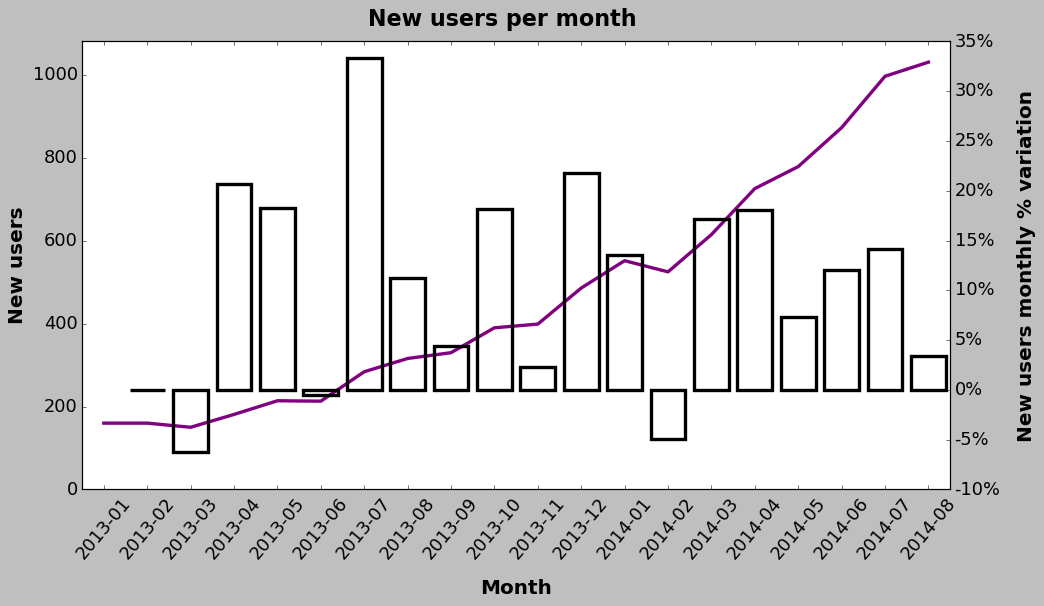

In [100]:
with plt.style.context('classic'):
    fig, ax1 = plt.subplots(figsize=(14,7))
    fig.suptitle("New users per month", fontsize=20, fontweight=650, y=0.96) 
    ax2 = ax1.twinx()
    
    sns.lineplot(signup_flow_1["month"], signup_flow_1["monthly_new_users"], lw=3, color="purple", ax=ax1)
    ax1.set_ylim(0, signup_flow_1.monthly_new_users.max()+50)
    ax1.tick_params(axis="x", labelsize=16, rotation=50)
    ax1.tick_params(axis="y", labelsize=16)
    ax1.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=15)
    ax1.set_ylabel("New users", fontsize=18, fontweight=650)
    
    sns.barplot(signup_flow_1["month"], signup_flow_1["new_users_variation_pct"], facecolor=(0, 0, 0, 0),
        edgecolor="black", linewidth=3, ax=ax2)
    ax2.tick_params(axis="x", labelsize=16, pad=10)
    ax2.tick_params(axis="y", labelsize=16)
    ax2.set_xlabel("Device type", fontsize=18, fontweight=650, labelpad=15)
    ax2.set_ylabel("New users monthly % variation", fontsize=18, fontweight=650, labelpad=15)
    
    ylabels = ['{:,.0f}%'.format(x) for x in ax2.get_yticks()]
    ax2.set_yticklabels(ylabels)


#### 2nd, this is the conversion funnel for the 4 months we have info on the log events.

In [101]:
query_signup_flow = """
SELECT DISTINCT event_name
FROM events
WHERE event_type='engagement';
"""
signup_flow_01 = pd.read_sql(query_signup_flow, engine)

In [102]:
query_signup_flow = """
SELECT *
FROM events
WHERE event_type='signup_flow';
"""
signup_flow_02 = pd.read_sql(query_signup_flow, engine)

In [103]:
signup_flow_02.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,12069.0,2014-05-07 20:38:05,signup_flow,create_user,Russia,nexus 5,NaN
1,11768.0,2014-05-01 08:01:36,signup_flow,create_user,France,macbook pro,NaN
2,11768.0,2014-05-01 08:02:06,signup_flow,enter_email,France,macbook pro,NaN
3,11768.0,2014-05-01 08:02:39,signup_flow,enter_info,France,macbook pro,NaN
4,11768.0,2014-05-01 08:03:12,signup_flow,complete_signup,France,macbook pro,3.0


In [104]:
query_signup_flow = """
SELECT sub.*
FROM(
    SELECT LEFT(((DATE_TRUNC('month', users.created_at::date) + INTERVAL '1 day')::text), 7) AS activation_month,
     COUNT(DISTINCT CASE WHEN events.event_name = 'create_user' THEN events.user_id ELSE null END) AS user_created_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'enter_email' THEN events.user_id ELSE null END) AS enter_email_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'enter_info' THEN events.user_id ELSE null END) AS enter_info_count,
     COUNT(DISTINCT CASE WHEN events.event_name = 'complete_signup' THEN events.user_id ELSE null END) AS complete_signup_count
    FROM events
    JOIN users
    ON users.user_id = events.user_id
    AND users.created_at >= '2014-05-01 00:00:00'
    GROUP BY activation_month
    )sub
WHERE activation_month > '2014-04-30 23:59:59';
"""

signup_flow_2 = pd.read_sql(query_signup_flow, engine)

In [105]:
signup_flow_2.head()

,activation_month,user_created_count,enter_email_count,enter_info_count,complete_signup_count
0,2014-05,1597,955,825,779
1,2014-06,1728,1067,925,873
2,2014-07,1983,1189,1043,997
3,2014-08,1990,1196,1079,1031


In [106]:
signup_flow_2.columns

Index(['activation_month', 'user_created_count', 'enter_email_count',
       'enter_info_count', 'complete_signup_count'],
      dtype='object')

In [116]:
fig = go.Figure(go.Funnel(
    y = ['user_created_count', 'enter_email_count', 'enter_info_count', 'complete_signup_count'],
    x = signup_flow_2.loc[0,['user_created_count', 'enter_email_count', 'enter_info_count', 'complete_signup_count']],
    textposition = "inside",
    textinfo = "value+percent initial",
    #opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "red", "teal"],
    opacity = 0.65, marker = {"color": ["darkgreen", "seagreen", "palegreen", "greenyellow"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

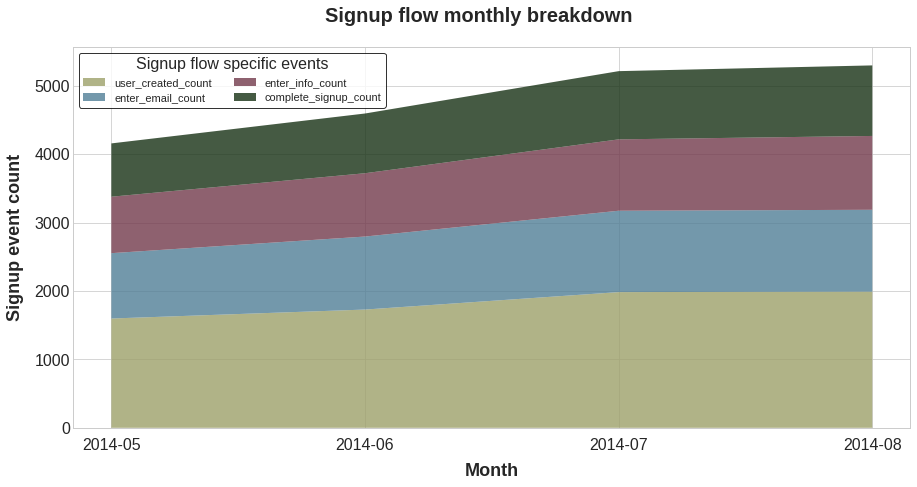

In [117]:
y = [signup_flow_2.user_created_count.tolist(), signup_flow_2.enter_email_count.tolist(),
     signup_flow_2.enter_info_count.tolist(), signup_flow_2.complete_signup_count.tolist()]

pal = sns.cubehelix_palette(4, rot=-2.5, light=0.6)

with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(15,7))
    fig.suptitle("Signup flow monthly breakdown", fontsize=20, fontweight=650, y=0.96)  
    
    plt.stackplot(signup_flow_2["activation_month"], y, labels=signup_flow_2.columns[1:5], lw=3.5,
    colors=pal, alpha=0.8)
    ax.tick_params(axis="x", labelsize=16, pad=10)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Signup event count", fontsize=18, fontweight=650, labelpad=10)

    ax.legend(loc="upper left", prop={'size': 11}, frameon="yes", edgecolor="black",
              title="Signup flow specific events", title_fontsize=16, ncol=2)

    plt.show()

*Check chart and comment. This confirms that signup flow has not been the reason*
I have to explain the proportions of each part of the funnel are at the same level over the months

### MK campaign/promotions

In [ ]:
query_mk = """
SELECT LEFT((DATE_TRUNC('month', occurred_at::date)::text), 7) AS month, action, COUNT(action) AS number_actions
FROM emails
GROUP BY month, action
ORDER BY month, number_actions DESC;
"""
mk_1 = pd.read_sql(query_mk, engine)

In [ ]:
mk_1

Presented in a pivot table format for chart consumption

In [ ]:
query_mk = """
SELECT SUBSTR(week::text, 6, 5) AS week_summary,
 ROUND(CAST((email_open::float/total_emails_sent::float) as numeric), 2) AS email_open_rate,
 ROUND(CAST((email_clickthrough::float/email_open::float) as numeric), 2) AS email_clickthrough_rate
FROM(
    SELECT sub.*, (sent_weekly_digest + sent_reengagement_email) AS total_emails_sent
    FROM(
        SELECT DATE_TRUNC('week', occurred_at::date) AS week,
         COUNT(CASE WHEN action = 'sent_weekly_digest' THEN user_id ELSE NULL END) AS sent_weekly_digest,
         COUNT(CASE WHEN action = 'sent_reengagement_email' THEN user_id ELSE NULL END) AS sent_reengagement_email,
         COUNT(CASE WHEN action = 'email_open' THEN user_id ELSE NULL END) AS email_open,
         COUNT(CASE WHEN action = 'email_clickthrough' THEN user_id ELSE NULL END) AS email_clickthrough
        FROM emails
        GROUP BY week
        ) sub
    ) sub2
ORDER BY week_summary;
"""
mk_2 = pd.read_sql(query_mk, engine)

In [ ]:
mk_2["email_open_rate"] = mk_2["email_open_rate"].apply(lambda x: x*100)
mk_2["email_clickthrough_rate"] = mk_2["email_clickthrough_rate"].apply(lambda x: x*100)

In [ ]:
mk_2.style.format({"email_open_rate":"{:.0f}%", "email_clickthrough_rate":"{:.0f}%"})

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle("Marketing emails rates", fontsize=22, fontweight=650, y=0.96)
    
    sns.lineplot(mk_2["week_summary"], mk_2["email_open_rate"], lw=3.5, color="purple")
    sns.lineplot(mk_2["week_summary"], mk_2["email_clickthrough_rate"], lw=3.5, color="peru")
    
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Week", fontsize=18, fontweight=650, labelpad=15)
    ax.set_ylabel("Rate", fontsize=18, fontweight=650, labelpad=15)

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')
        
    ylabels = ['{:,.0f}%'.format(x) for x in ax.get_yticks()]
    ax.set_yticklabels(ylabels)
    
    ax.legend(loc="upper right", prop={'size': 12}, frameon="yes", edgecolor="black",
              labels=['email open rate','email click-through rate'],
              title="Signup flow specific events", title_fontsize=16, ncol=2)

    plt.show()

### Bad data. QA/bots

*In order to ascertain whether this is the cause, we need to see activity by user and check whether there is unusual activity by few of them. This would cause artificial activity or in other words, a certain kind of spike/unusual rise, which in our case could make sense to have it in july. If this happened to be true, we could say that august drop in user engagement is not such, because it would be rather a problem of fake user engagement in the preceding month.*

First I am going to check whether there is anyone starting engaging with the web but not loging in, this would be pointing to both bots and QA that maybe dont need to sign up (especially bots).

In [ ]:
query_bad_data = """
SELECT sub2.*
FROM(
    SELECT sub.*, ROW_NUMBER() OVER (PARTITION BY user_id, day ORDER BY occurred_at::date) AS user_events_per_day
    FROM(
        SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
        FROM events
        WHERE event_type = 'engagement'
        ) sub
    ) sub2
WHERE user_events_per_day = 1 AND event_name != 'login' 
 AND EXTRACT('hour' FROM occurred_at::date)!=0; -- Taking those at 12am that were logged minutes before but in the previous day.
"""
qa_bots = pd.read_sql(query_bad_data, engine)

In [ ]:
qa_bots

Second, let's see if there are some days with unusual activity (maybe happening in july at the most).

In [ ]:
query_bad_data = """
SELECT user_id, sub.day, COUNT(event_name) AS number_events_per_day
FROM(
    SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
    FROM events
    WHERE event_type = 'engagement'
    ) sub
WHERE day >= '2014-05-01 00:00:00+00:00'
GROUP BY user_id, day
ORDER BY number_events_per_day DESC;
"""
qa_bots_2 = pd.read_sql(query_bad_data, engine)

In [ ]:
qa_bots_2["ranking"] = (range(1, len(qa_bots_2)+1))

In [ ]:
qa_bots_2.head()

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(13,7))
    fig.suptitle("Ranked users daily Hub usage", fontsize=22, fontweight=650, y=0.96)
    
    plt.plot(qa_bots_2["ranking"], qa_bots_2["number_events_per_day"], lw=4, color="gold")
    plt.fill_between(qa_bots_2["ranking"], qa_bots_2["number_events_per_day"].min(),
                     qa_bots_2["number_events_per_day"], facecolor='gray', alpha=0.3)
    
    ax.tick_params(axis="x", labelsize=16)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Users ranking", fontsize=18, fontweight=650, labelpad=15)
    ax.set_ylabel("number interactions per day", fontsize=18, fontweight=650, labelpad=15)
    
    plt.show()


Let's identify outliers (be them real or not, does not matter at this point, just let's find what are considered as outliers

In [ ]:
stats = qa_bots_2.number_events_per_day.describe().to_frame().transpose()
stats["IQR"] = stats["75%"] - stats["25%"]
stats

In [ ]:
outliers_qa_bots = pd.DataFrame(columns=qa_bots_2.columns)

iqr = stats.at["number_events_per_day","IQR"]
cutoff = iqr * 3
upper = stats.at["number_events_per_day","75%"] + cutoff
results = qa_bots_2[(qa_bots_2["number_events_per_day"] > upper)].copy()
outliers_qa_bots = outliers_qa_bots.append(results)

In [ ]:
outliers_qa_bots["month"] = outliers_qa_bots["day"].apply(lambda x: x.strftime("%Y-%m"))

In [ ]:
outliers_qa_bots.head()

In [ ]:
outliers_qa_bots_group = outliers_qa_bots.groupby("month")["number_events_per_day"].sum().reset_index()

In [ ]:
outliers_qa_bots_group

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(12,7))
    fig.suptitle("Sum of Hub interactions from outliers per month", fontsize=20, fontweight=650, y=0.94)
    
    ax.bar(outliers_qa_bots_group["month"], outliers_qa_bots_group["number_events_per_day"], 
           color="khaki", width=0.6, edgecolor="black", linewidth=3)
    ax.tick_params(axis="x", labelsize=16, pad=5)
    ax.tick_params(axis="y", labelsize=16)
    ax.set_xlabel("Month", fontsize=18, fontweight=650, labelpad=10)
    ax.set_ylabel("Hub interactions", fontsize=18, fontweight=650, labelpad=10)

    plt.show()

COMMENT!! This would be a step between the second and the third

In [ ]:
query_bad_data = """
SELECT LEFT(sub2.day::text, 10) AS day, SUM(sub2.number_events_per_day_per_head) as number_events_per_day
FROM(
    SELECT user_id, sub.day, COUNT(event_name) AS number_events_per_day_per_head
    FROM(
        SELECT *, DATE_TRUNC('day', occurred_at::date) AS day
        FROM events
        WHERE event_type = 'engagement'
        ) sub
    GROUP BY user_id, day
    ORDER BY number_events_per_day_per_head DESC
     ) sub2  
GROUP BY day
ORDER BY day;
"""
qa_bots_2_3 = pd.read_sql(query_bad_data, engine)

In [ ]:
qa_bots_2_3.info()

In [ ]:
qa_bots_2_3.head()

In [ ]:
import datetime
import matplotlib.dates as mdates
import numpy as np

In [ ]:
qa_bots_2_3["week"] = qa_bots_2_3["day"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())

In [ ]:
qa_bots_2_3.head()

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle("Weekly active users", fontsize=22, fontweight=650, y=0.94)
    
    sns.lineplot(qa_bots_2_3["week"], qa_bots_2_3["number_events_per_day"], lw=5, color="navy")
    ax.set_ylim(0,)
    ax.tick_params(axis="x", labelsize=16, rotation=50)
    ax.tick_params(axis="y", labelsize=16)
    plt.yticks(np.arange(0, 5000, step=500))
    
    ax.set_xlabel("Date", fontsize=18, fontweight=650)
    ax.set_ylabel("Active users", fontsize=18, fontweight=650)
    
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))

    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

    plt.show()